In [95]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [96]:
filename = ('Data/City.csv')
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Part 1

In [97]:
# Filter four largest cities
df2 = df.loc[(df['SizeRank'] >= 0) & (df['SizeRank'] <= 3)]
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 8.8+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [98]:
# Melt data to longform
melted = pd.melt(df2, id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType',
                                'StateName', 'State', 'Metro', 'CountyName'],
                value_name = 'HomeValue', var_name = 'Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [99]:
# Convert to datetime datatype
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [100]:
# Make datetime column the index
melted = melted.set_index('Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [101]:
# Resample as monthly frequency grouped by City
df_ts = melted.groupby('RegionName').resample("MS").sum()
df_ts

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_19774/255333164.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").sum()


RegionID  SizeRank  HomeValue
RegionName Date                                     
Chicago    2000-01-01     17426         3   166139.0
           2000-02-01     17426         3   166536.0
           2000-03-01     17426         3   167368.0
           2000-04-01     17426         3   168826.0
           2000-05-01     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-01      6181         0   768797.0
           2022-06-01      6181         0   773944.0
           2022-07-01      6181         0   777692.0
           2022-08-01      6181         0   779960.0
           2022-09-01      6181         0   781622.0

[1092 rows x 3 columns]

In [102]:
df_ts.head().index

MultiIndex([('Chicago', '2000-01-01'),
            ('Chicago', '2000-02-01'),
            ('Chicago', '2000-03-01'),
            ('Chicago', '2000-04-01'),
            ('Chicago', '2000-05-01')],
           names=['RegionName', 'Date'])

## Part 2

In [103]:
plot_df = df_ts.copy()
plot_df

RegionID  SizeRank  HomeValue
RegionName Date                                     
Chicago    2000-01-01     17426         3   166139.0
           2000-02-01     17426         3   166536.0
           2000-03-01     17426         3   167368.0
           2000-04-01     17426         3   168826.0
           2000-05-01     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-01      6181         0   768797.0
           2022-06-01      6181         0   773944.0
           2022-07-01      6181         0   777692.0
           2022-08-01      6181         0   779960.0
           2022-09-01      6181         0   781622.0

[1092 rows x 3 columns]

In [104]:
# Experimenting
plot_df = plot_df.drop(columns = ['RegionID', 'SizeRank'])
plot_df

HomeValue
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

In [105]:
# Level 0 is city/region
plot_df.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [106]:
# Level 1 is date
plot_df.index.get_level_values(1)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [107]:
unstacked = plot_df.unstack(level = 0)
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_19774/3173649595.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:}'.format(x) for x in current_values]);


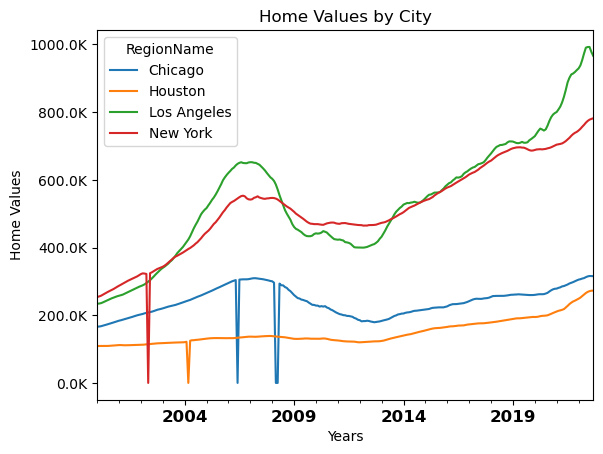

In [109]:
ax = unstacked['HomeValue'].plot(title= 'Home Values by City', 
                                 ylabel = 'Home Values', xlabel = 'Years')

## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),fontsize= 'large',fontweight='bold');

# Y Axis: remove scientific notation/ add K for thousands
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:}'.format(x) for x in current_values]);
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: '{:}'.format(x/1000) + 'K'));

## Source: https://stackoverflow.com/posts/53747693/revisions

**Which City had the highest typical home value at the end of 2008? Which had the least?**

In [126]:
plot_df.loc[pd.IndexSlice[:, '2008'],:]

HomeValue
RegionName  Date                 
Chicago     2008-01-01   300207.0
            2008-02-01   296063.0
            2008-03-01        0.0
            2008-04-01        0.0
            2008-05-01   293467.0
            2008-06-01   288495.0
            2008-07-01   288174.0
            2008-08-01   283199.0
            2008-09-01   280695.0
            2008-10-01   274849.0
            2008-11-01   271059.0
            2008-12-01   265306.0
Houston     2008-01-01   138208.0
            2008-02-01   137512.0
            2008-03-01   136795.0
            2008-04-01   136628.0
            2008-05-01   136228.0
            2008-06-01   135773.0
            2008-07-01   135392.0
            2008-08-01   134770.0
            2008-09-01   133932.0
            2008-10-01   133189.0
            2008-11-01   132247.0
            2008-12-01   131283.0
Los Angeles 2008-01-01   603029.0
            2008-02-01   596635.0
            2008-03-01   586065.0
            2008-04-01   571226.0
            2008-05-01   554589.0
            2008-06-01   539622.0
            2008-07-01   524220.0
            2008-08-01   510520.0
            2008-09-01   500124.0
            2008-10-01   490979.0
            2008-11-01   481905.0
            2008-12-01   469294.0
New York    2008-01-01   546538.0
            2008-02-01   546098.0
            2008-03-01   544562.0
            2008-04-01   541865.0
            2008-05-01   537685.0
            2008-06-01   533810.0
            2008-07-01   529211.0
            2008-08-01   525290.0
            2008-09-01   521347.0
            2008-10-01   518048.0
            2008-11-01   514767.0
            2008-12-01   510309.0

In [121]:
max_city = plot_df.loc[pd.IndexSlice[:, '2008'],:].idxmax()
max_city

HomeValue    (Los Angeles, 2008-01-01 00:00:00)
dtype: object

In [122]:
max_value = plot_df.loc[max_city]
max_value

,,HomeValue
RegionName,Date,
Los Angeles,2008-01-01,603029.0


In [124]:
min_city = plot_df.loc[pd.IndexSlice[:, '2008'],:].idxmin()
min_city

HomeValue    (Chicago, 2008-03-01 00:00:00)
dtype: object

In [127]:
min_value = plot_df.loc[min_city]
min_value

,,HomeValue
RegionName,Date,
Chicago,2008-03-01,0.0


**How much did the home values change from November 2008 to December 2008?**

In [130]:
# November home values
plot_df.loc[pd.IndexSlice[:, '2008-11'],:]

,,HomeValue
RegionName,Date,
Chicago,2008-11-01,271059.0
Houston,2008-11-01,132247.0
Los Angeles,2008-11-01,481905.0
New York,2008-11-01,514767.0


In [137]:
nov_values = plot_df.loc[pd.IndexSlice[:, '2008-11'],:].mean()
nov_values

HomeValue    349994.5
dtype: float64

In [134]:
# December home values
plot_df.loc[pd.IndexSlice[:, '2008-12'],:]

,,HomeValue
RegionName,Date,
Chicago,2008-12-01,265306.0
Houston,2008-12-01,131283.0
Los Angeles,2008-12-01,469294.0
New York,2008-12-01,510309.0


In [138]:
dec_values = plot_df.loc[pd.IndexSlice[:, '2008-12'],:].mean()
dec_values

HomeValue    344048.0
dtype: float64

In [139]:
# Home price dropped by 
dec_values - nov_values

HomeValue   -5946.5
dtype: float64